In [2]:
import torch
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from scipy.io import loadmat
import numpy as np

In [3]:
filename = 'data1.mat'
data_base = loadmat(filename)
data_new = torch.from_numpy(data_base["X"])
data_base['X'],data_base['y']

(array([[1.9643  , 4.5957  ],
        [2.2753  , 3.8589  ],
        [2.9781  , 4.5651  ],
        [2.932   , 3.5519  ],
        [3.5772  , 2.856   ],
        [4.015   , 3.1937  ],
        [3.3814  , 3.4291  ],
        [3.9113  , 4.1761  ],
        [2.7822  , 4.0431  ],
        [2.5518  , 4.6162  ],
        [3.3698  , 3.9101  ],
        [3.1048  , 3.0709  ],
        [1.9182  , 4.0534  ],
        [2.2638  , 4.3706  ],
        [2.6555  , 3.5008  ],
        [3.1855  , 4.2888  ],
        [3.6579  , 3.8692  ],
        [3.9113  , 3.4291  ],
        [3.6002  , 3.1221  ],
        [3.0357  , 3.3165  ],
        [1.5841  , 3.3575  ],
        [2.0103  , 3.2039  ],
        [1.9527  , 2.7843  ],
        [2.2753  , 2.7127  ],
        [2.3099  , 2.9584  ],
        [2.8283  , 2.6309  ],
        [3.0473  , 2.2931  ],
        [2.4827  , 2.0373  ],
        [2.5057  , 2.3853  ],
        [1.8721  , 2.0577  ],
        [2.0103  , 2.3546  ],
        [1.2269  , 2.3239  ],
        [1.8951  , 2.9174  ],
        [1

In [4]:
data_train,data_test = train_test_split(np.hstack((data_base['X'],data_base['y'])),test_size=0.3,random_state=True)
len(data_base['X']),len(data_train),len(data_test)

(51, 35, 16)

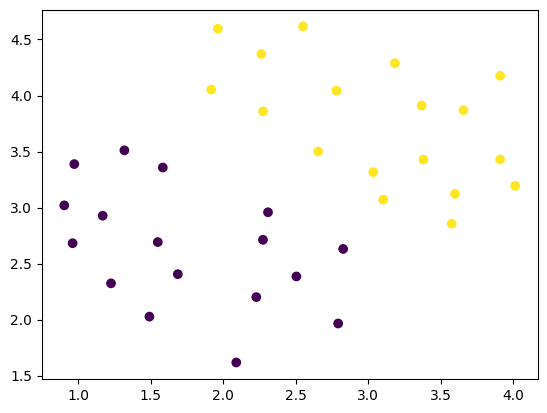

In [42]:
plt.scatter(data_train[:,0],data_train[:,1],c=data_train[:,2])

In [14]:
model = svm.SVC(kernel= 'linear',C = 1)
model.fit(data_train[:,:2],data_train[:,2].ravel())

SVC(C=1, kernel='linear')

1.0


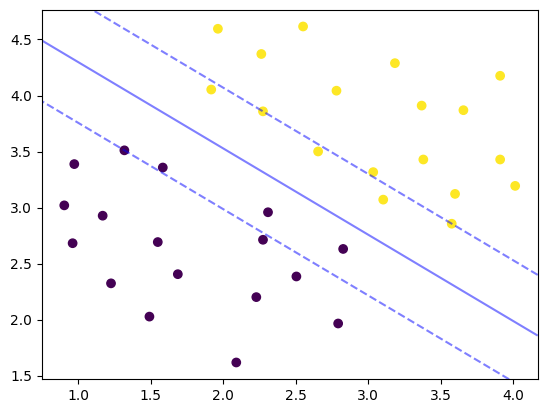

In [15]:
score = model.score(data_train[:,:2],data_train[:,2])
print(score)
def draw_decision_line():
    plt.scatter(data_train[:,0],data_train[:,1],c=data_train[:,2])

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0],xlim[1],30)
    yy = np.linspace(ylim[0],ylim[1],30)
    YY,XX = np.meshgrid(yy,xx)

    xy = np.vstack([XX.ravel(),YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    ax.contour(XX,YY,Z,colors='b',levels = [-1,0,1],alpha=0.5,linestyles = ['--','-','--'])
    ax.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1],s=100,linewidths=1,facecolors='none')

# xx = np.arange(0, 4, 0.1)

# yy1 = -p1 / p2 * xx - b/p2 + 1 
# plt.scatter(xx, yy1, s=4)
# yy2 = -p1 / p2 * xx - b/p2 - 1
# plt.scatter(xx, yy2, s=4)

# plt.plot(xx,-p1/p2*xx - b/p2,c = 'g')
# plt.plot()
# plt.show()
draw_decision_line()

0.9375


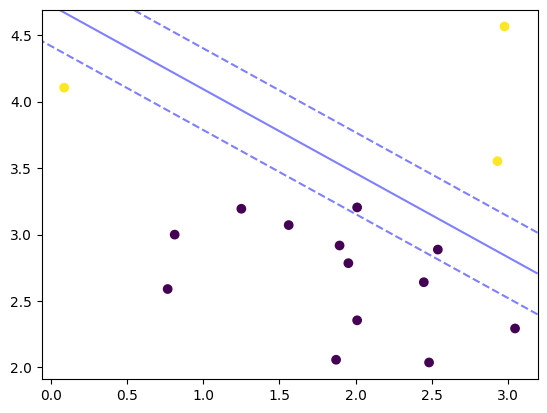

In [10]:
plt.scatter(data_test[:,0],data_test[:,1],c=data_test[:,2])

print(model.score(data_test[:,:2],data_test[:,2].ravel()))
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0],xlim[1],30)
yy = np.linspace(ylim[0],ylim[1],30)
YY,XX = np.meshgrid(yy,xx)

xy = np.vstack([XX.ravel(),YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)
ax.contour(XX,YY,Z,colors='b',levels = [-1,0,1],alpha=0.5,linestyles = ['--','-','--'])
ax.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1],s=100,linewidths=1,facecolors='none')